In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin', 'car_name']
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t', sep=' ', skipinitialspace=True)


In [3]:
raw_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


In [4]:
dataset = raw_dataset.copy()


In [5]:
X = dataset[['horsepower']].astype('float32')
y = dataset[['mpg']].astype('float32')


In [6]:
X = (X - X.mean()) / X.std()


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])



In [10]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mean_squared_error')


In [11]:
history = model.fit(X_train, y_train, epochs=100, verbose=0)


In [12]:
loss = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan

Test Loss: nan


In [13]:
weights = model.get_weights()
print(f"\nLearned weight: {weights[0][0][0]:.4f}, bias: {weights[1][0]:.4f}")



Learned weight: nan, bias: nan


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


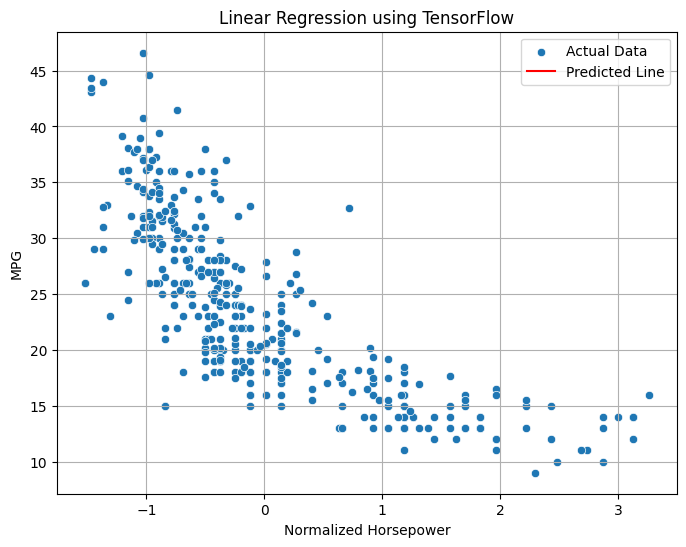

In [14]:
y_pred = model.predict(X).flatten()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['horsepower'], y=y['mpg'], label="Actual Data")
sns.lineplot(x=X['horsepower'], y=y_pred, color='red', label="Predicted Line")
plt.xlabel('Normalized Horsepower')
plt.ylabel('MPG')
plt.title('Linear Regression using TensorFlow')
plt.grid(True)
plt.legend()
plt.show()